In [39]:
#ML to predict fetal health

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('seaborn-v0_8-whitegrid')
from scipy import stats
import scipy.stats as stats 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder ,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif ,f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler,MinMaxScaler ,LabelEncoder
import xgboost as XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
print('complete')

complete


In [27]:
#Let's start by reading the cleaned dataset

df = pd.read_csv("../Data/Clean/cleaned_df_fetal_health.csv")
df.head()

,baseline_value_FHR(BPM),accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,FHR_min,FHR_max,FHR_n_of_peaks,FHR_n_of_zeros,FHR_mode,FHR_mean,FHR_median,FHR_variance,FHR_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [42]:
df.shape

(2113, 22)

**Identifying the most important features to predict fetal health**
Identify columns with high variance

In [44]:
# Group data by fetal_health and compute summary statistics for each feature
grouped_stats = df.groupby('fetal_health').describe().T
print(grouped_stats)

fetal_health                        Normal  Pathological     Suspect
baseline_value_FHR(BPM) count  1646.000000    175.000000  292.000000
                        mean    131.998177    131.668571  141.650685
                        std       9.451492      9.456731    7.921950
                        min     106.000000    110.000000  120.000000
                        25%     125.000000    128.000000  137.000000
...                                    ...           ...         ...
FHR_tendency            min      -1.000000     -1.000000   -1.000000
                        25%       0.000000     -1.000000    0.000000
                        50%       0.000000      0.000000    0.000000
                        75%       1.000000      0.000000    1.000000
                        max       1.000000      1.000000    1.000000

[168 rows x 3 columns]


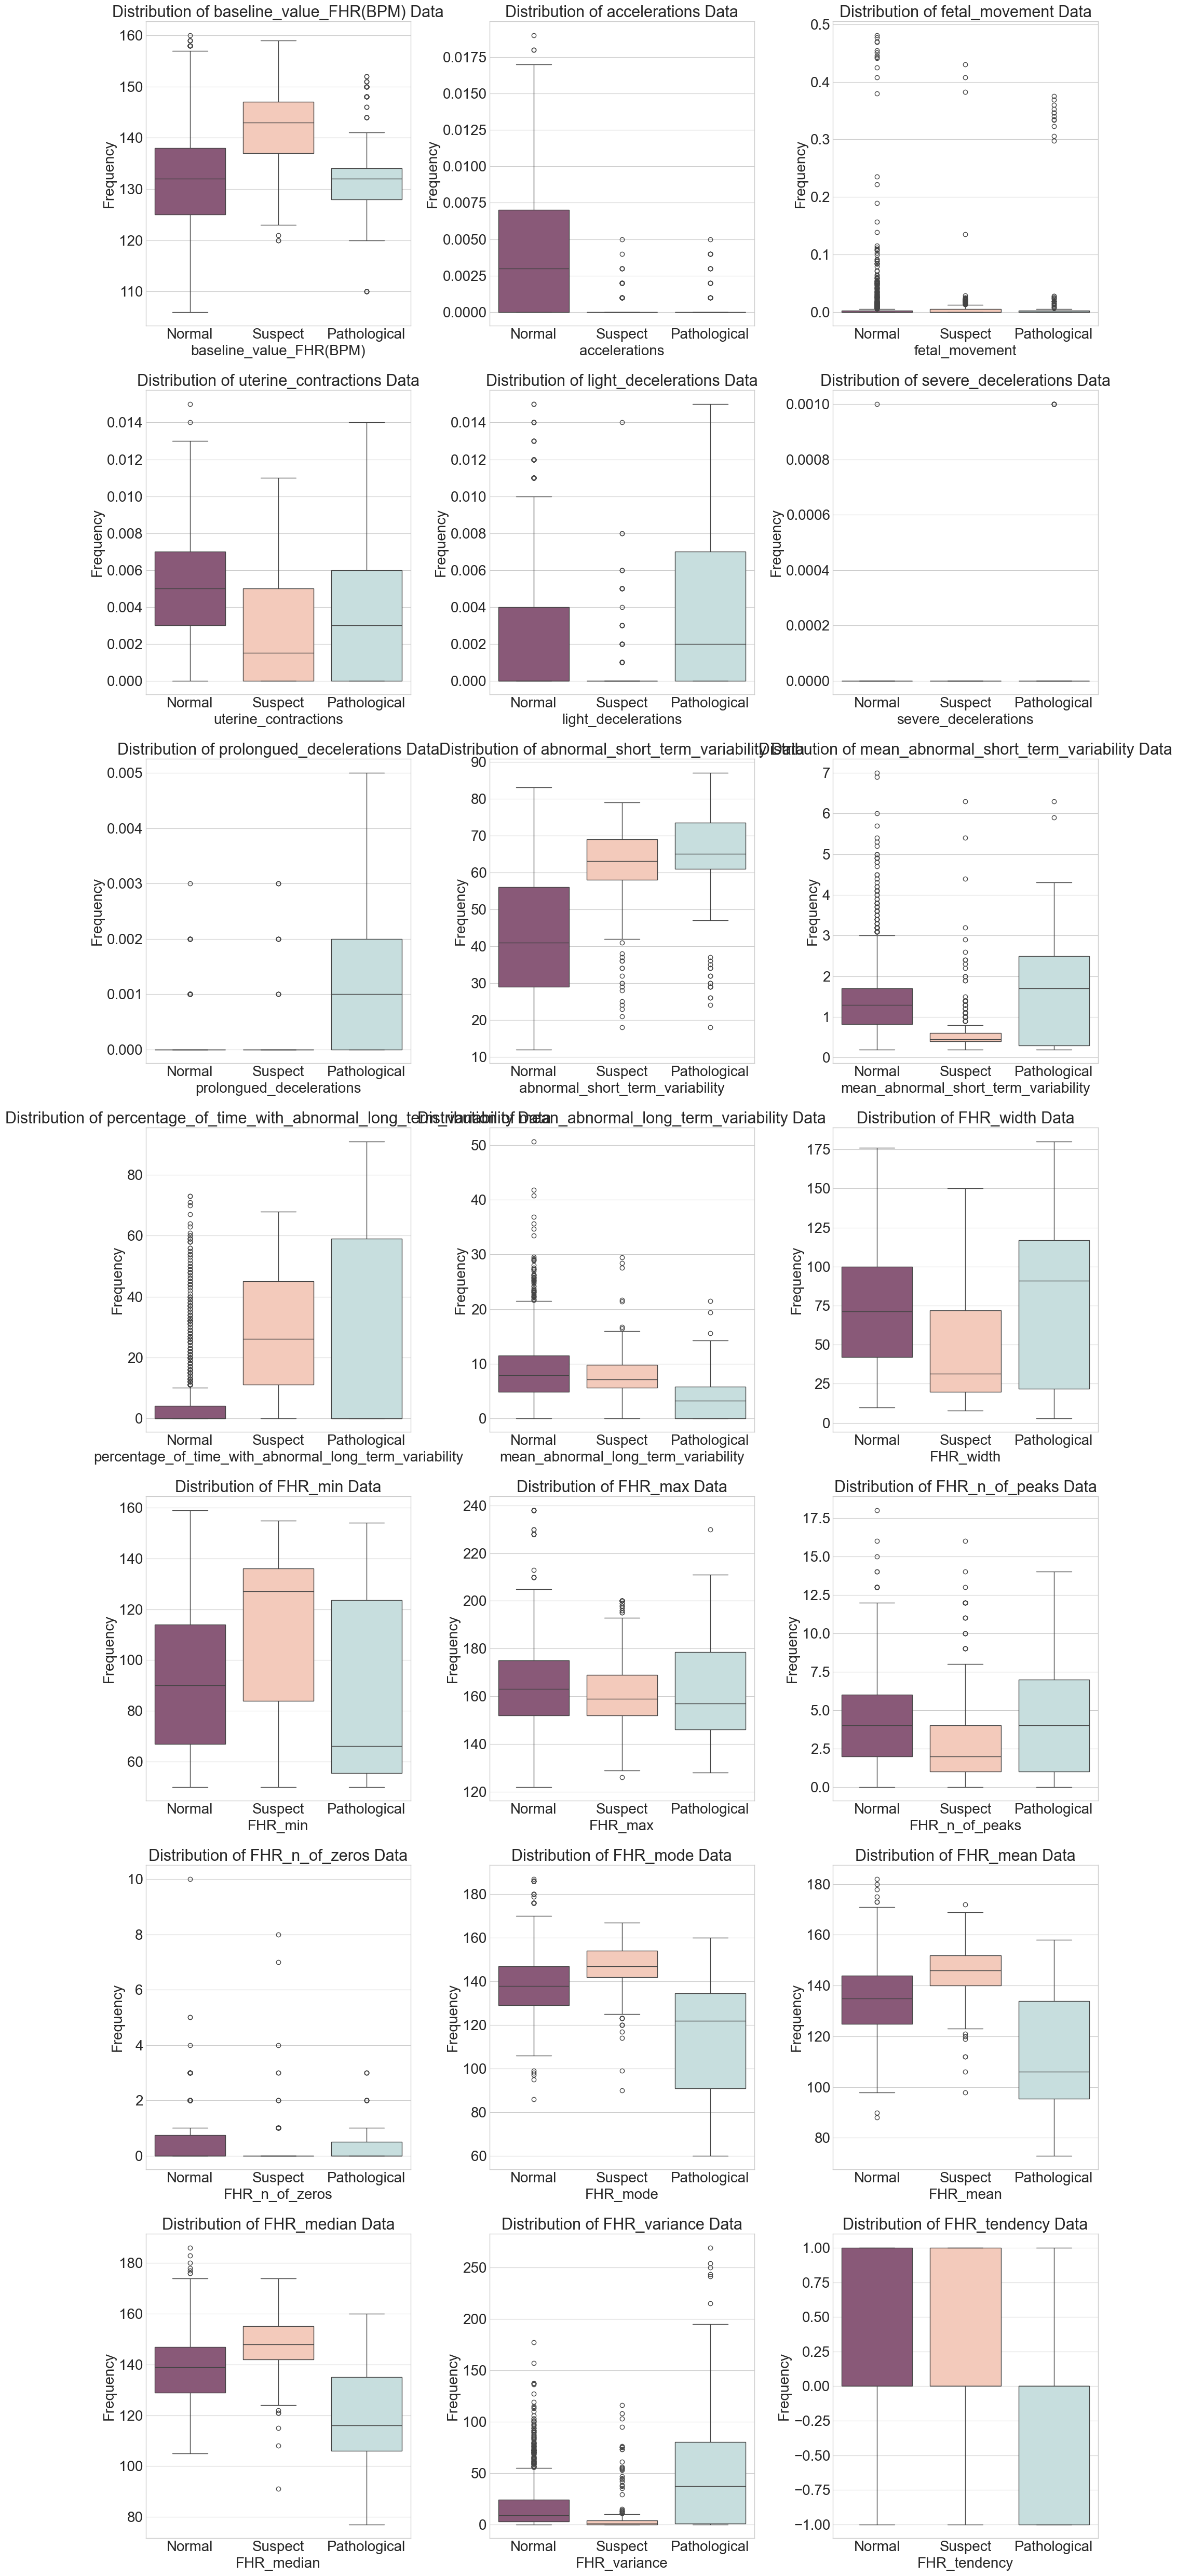

In [45]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suppress warnings
warnings.filterwarnings('ignore')

# Set seaborn style
plt.style.use('seaborn-v0_8-whitegrid')

# Drop the target variable from the features
X = df.drop('fetal_health', axis=1)

custom_palette = {'Normal': '#91517b', 'Suspect': '#fdc5b1', 'Pathological': '#c3e2e2'}

# Convert 'fetal_health' to a categorical type with the specified order
df['fetal_health'] = pd.Categorical(df['fetal_health'], 
                                     categories=["Normal", "Suspect", "Pathological"], 
                                     ordered=True)

# Create the figure
plt.figure(figsize=(20, 50))
num_row = 1

# Loop through each column to create the subplots
for col in X.columns:
    plt.rcParams['font.size'] = 20   
    plt.subplot(7, 3, num_row)
    
    # Set title with larger font size
    plt.title(f"Distribution of {col} Data", fontsize=22)  

    # Plot boxplot with the specified hue order
    sns.boxplot(y=df[col], x=df['fetal_health'], palette=custom_palette)
              
    # Set x and y axis labels with larger font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    
    # Set larger font size for ticks
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    # Adjust layout
    plt.tight_layout()
    
    num_row += 1

# Show the plots
plt.show()

In [46]:
from scipy.stats import f_oneway

# Apply ANOVA test for each feature to see which ones differ significantly across fetal_health
anova_results = {}
for col in df.drop('fetal_health', axis=1).columns:
    groups = [df[df['fetal_health'] == category][col] for category in df['fetal_health'].cat.categories]
    f_stat, p_value = f_oneway(*groups)
    anova_results[col] = p_value

# Sort features by their p-values (lower p-value means more significant difference)
anova_results = pd.Series(anova_results).sort_values()
print(anova_results)

prolongued_decelerations                                  1.284117e-180
abnormal_short_term_variability                           5.762476e-128
percentage_of_time_with_abnormal_long_term_variability    3.337805e-127
FHR_mean                                                  5.688802e-115
FHR_mode                                                  2.464580e-107
FHR_median                                                 4.653327e-98
accelerations                                              2.698959e-78
FHR_variance                                               5.329884e-62
baseline_value_FHR(BPM)                                    5.488269e-57
mean_abnormal_short_term_variability                       2.524827e-49
uterine_contractions                                       1.082209e-39
FHR_min                                                    8.070895e-37
mean_abnormal_long_term_variability                        6.340803e-30
light_decelerations                                        7.777

In [47]:
import pandas as pd
from scipy.stats import f_oneway

# Function to assign significance stars
def get_significance_symbol(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return ''

# Apply ANOVA test for each feature to see which ones differ significantly across fetal_health
anova_results = {}
for col in df.drop('fetal_health', axis=1).columns:
    groups = [df[df['fetal_health'] == category][col] for category in df['fetal_health'].cat.categories]
    f_stat, p_value = f_oneway(*groups)
    anova_results[col] = p_value

# Convert results to a pandas Series and sort by p-values
anova_results = pd.Series(anova_results).sort_values()

# Create a DataFrame with p-values and significance stars
anova_df = pd.DataFrame({
    'Feature': anova_results.index,
    'p-value': anova_results.values,
    'Significance': [get_significance_symbol(p) for p in anova_results.values]
})

# Save the DataFrame to a CSV file
#anova_df.to_csv('anova_results_with_significance.csv', index=False)

print("ANOVA results have been saved to 'anova_results_with_significance.csv'")

ANOVA results have been saved to 'anova_results_with_significance.csv'


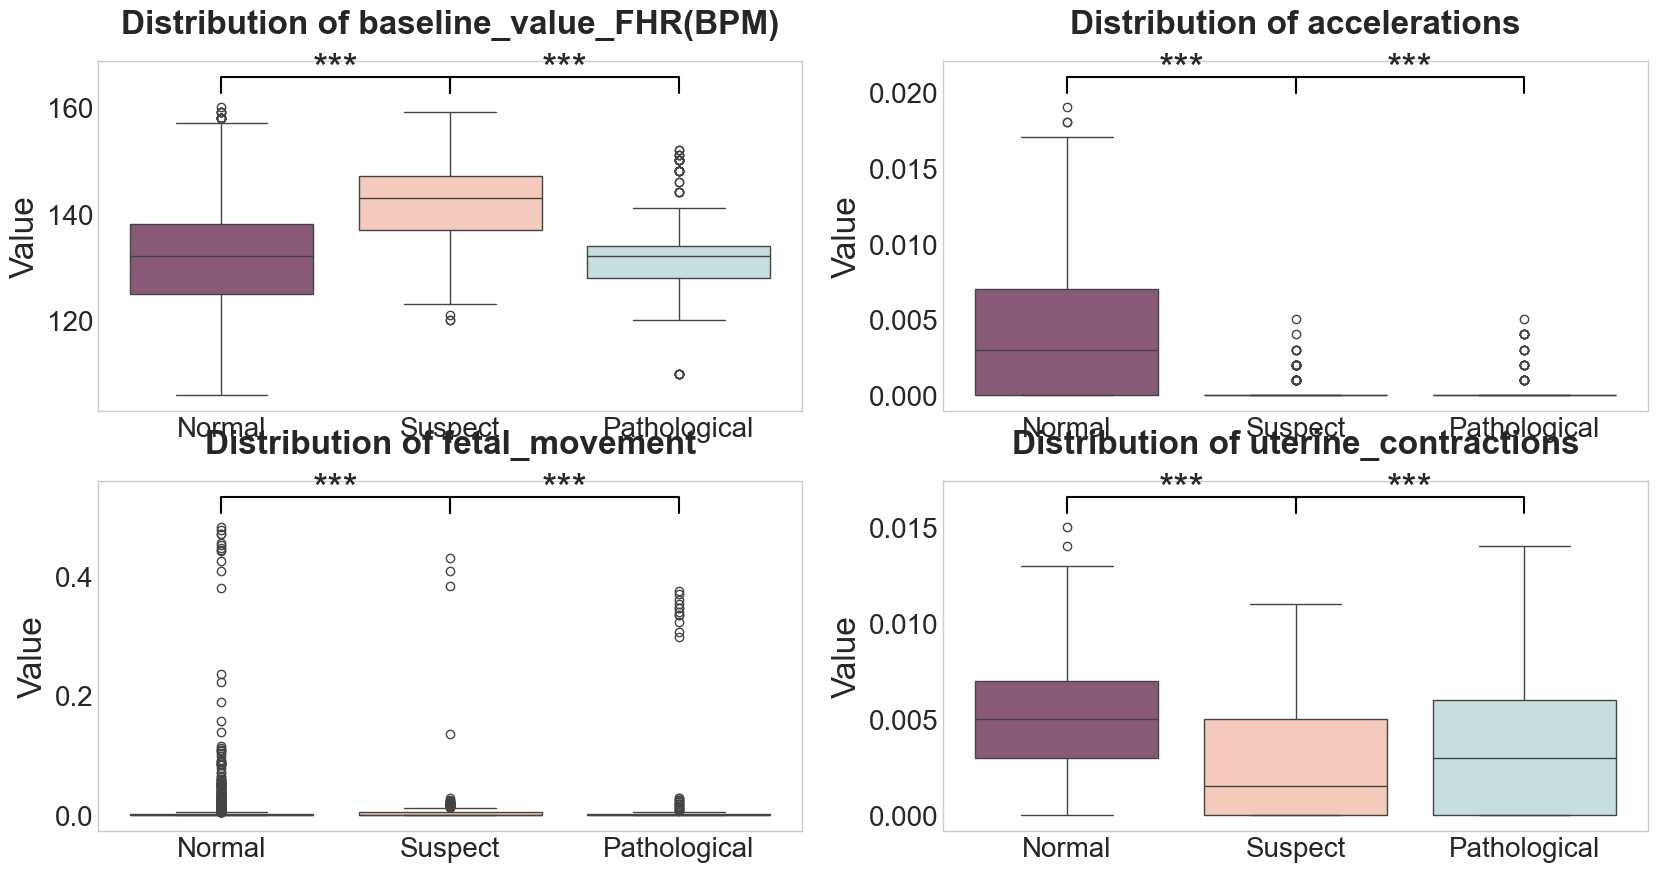

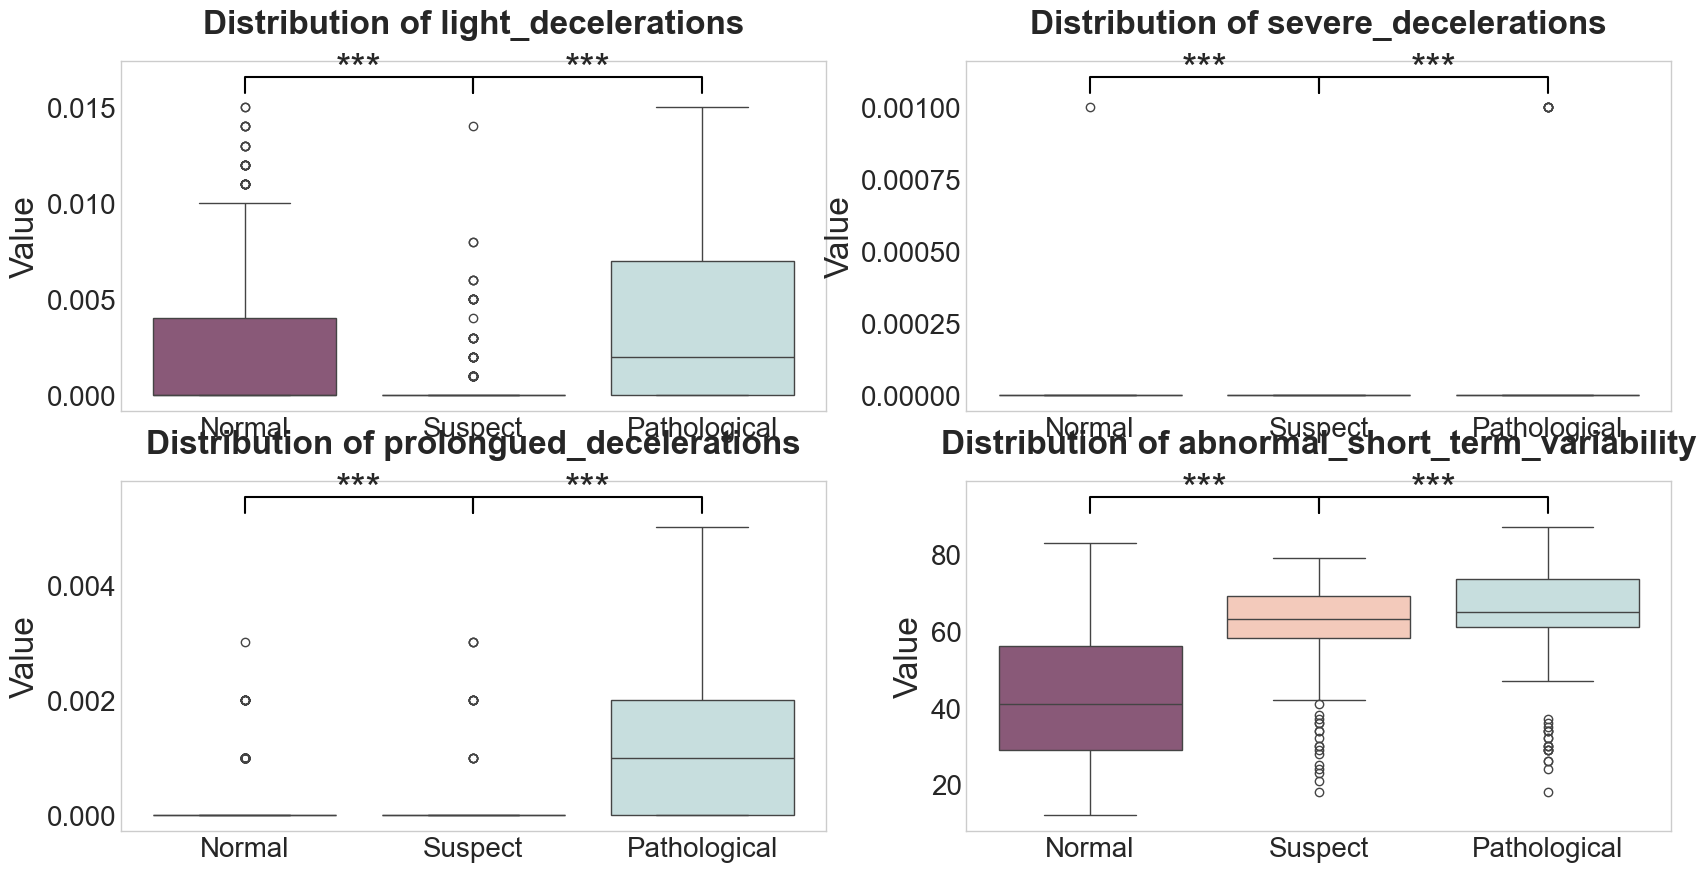

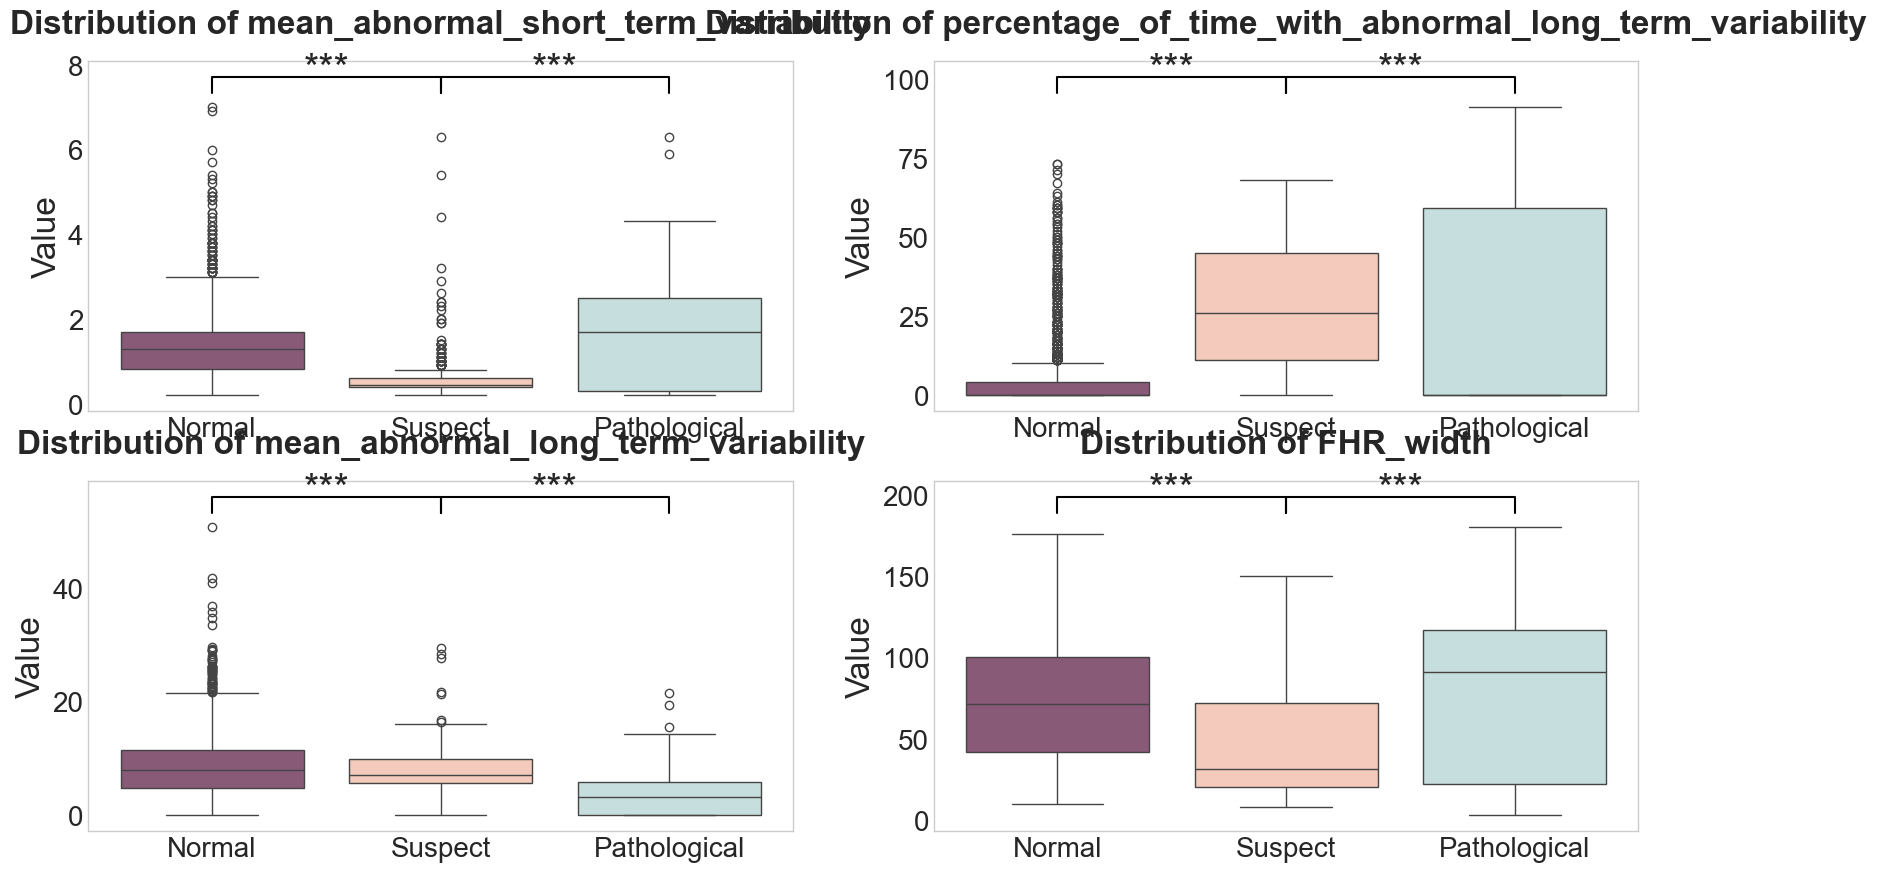

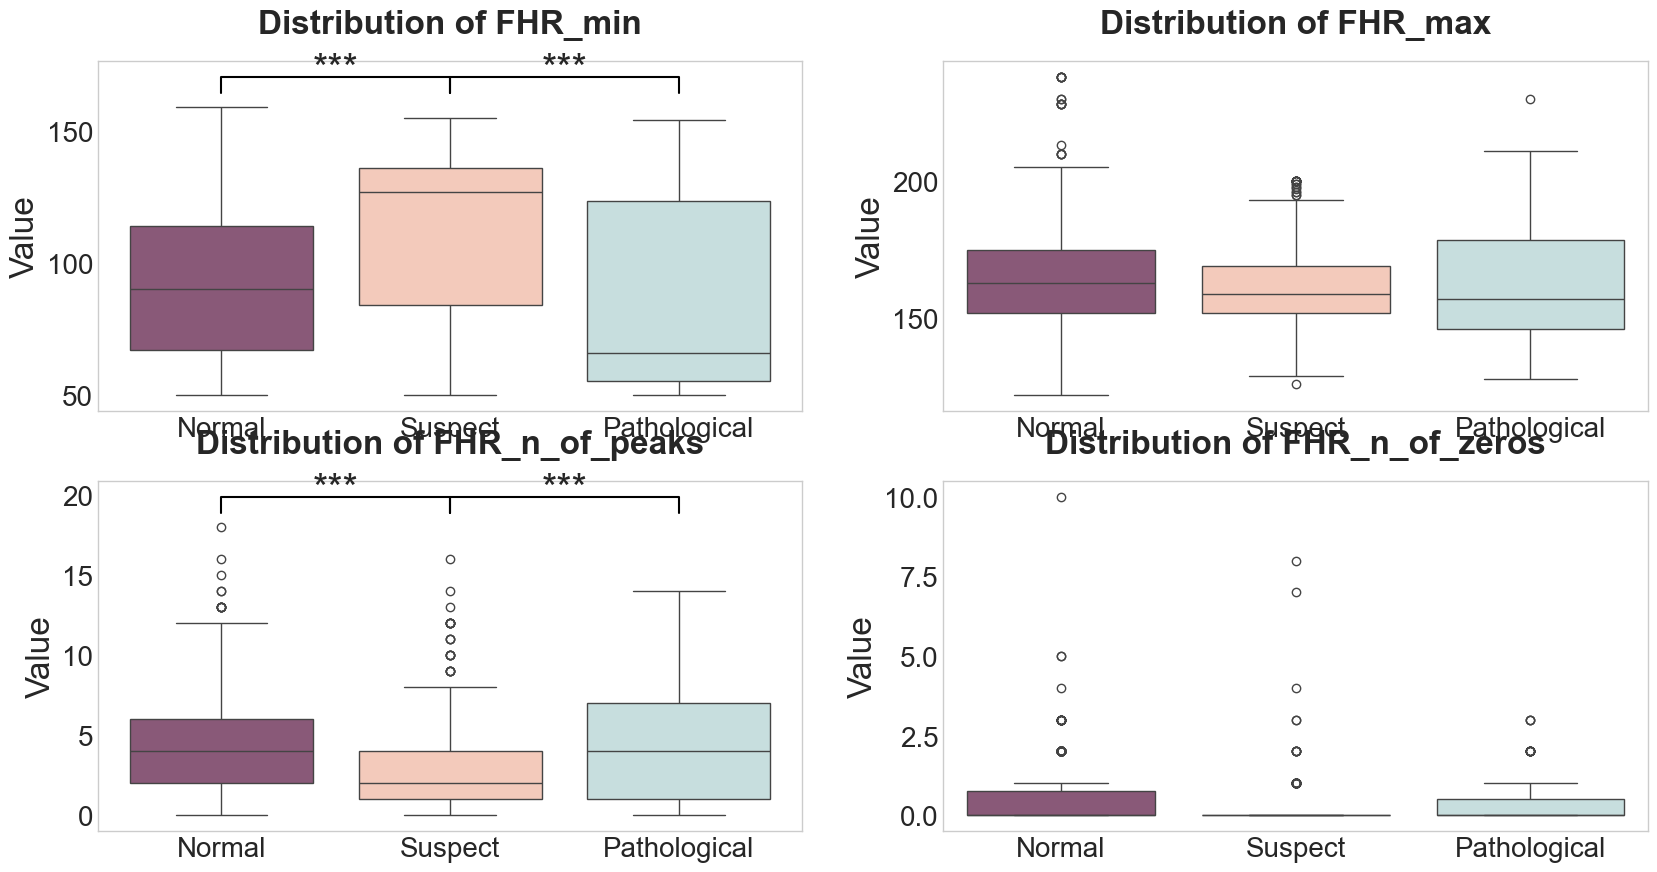

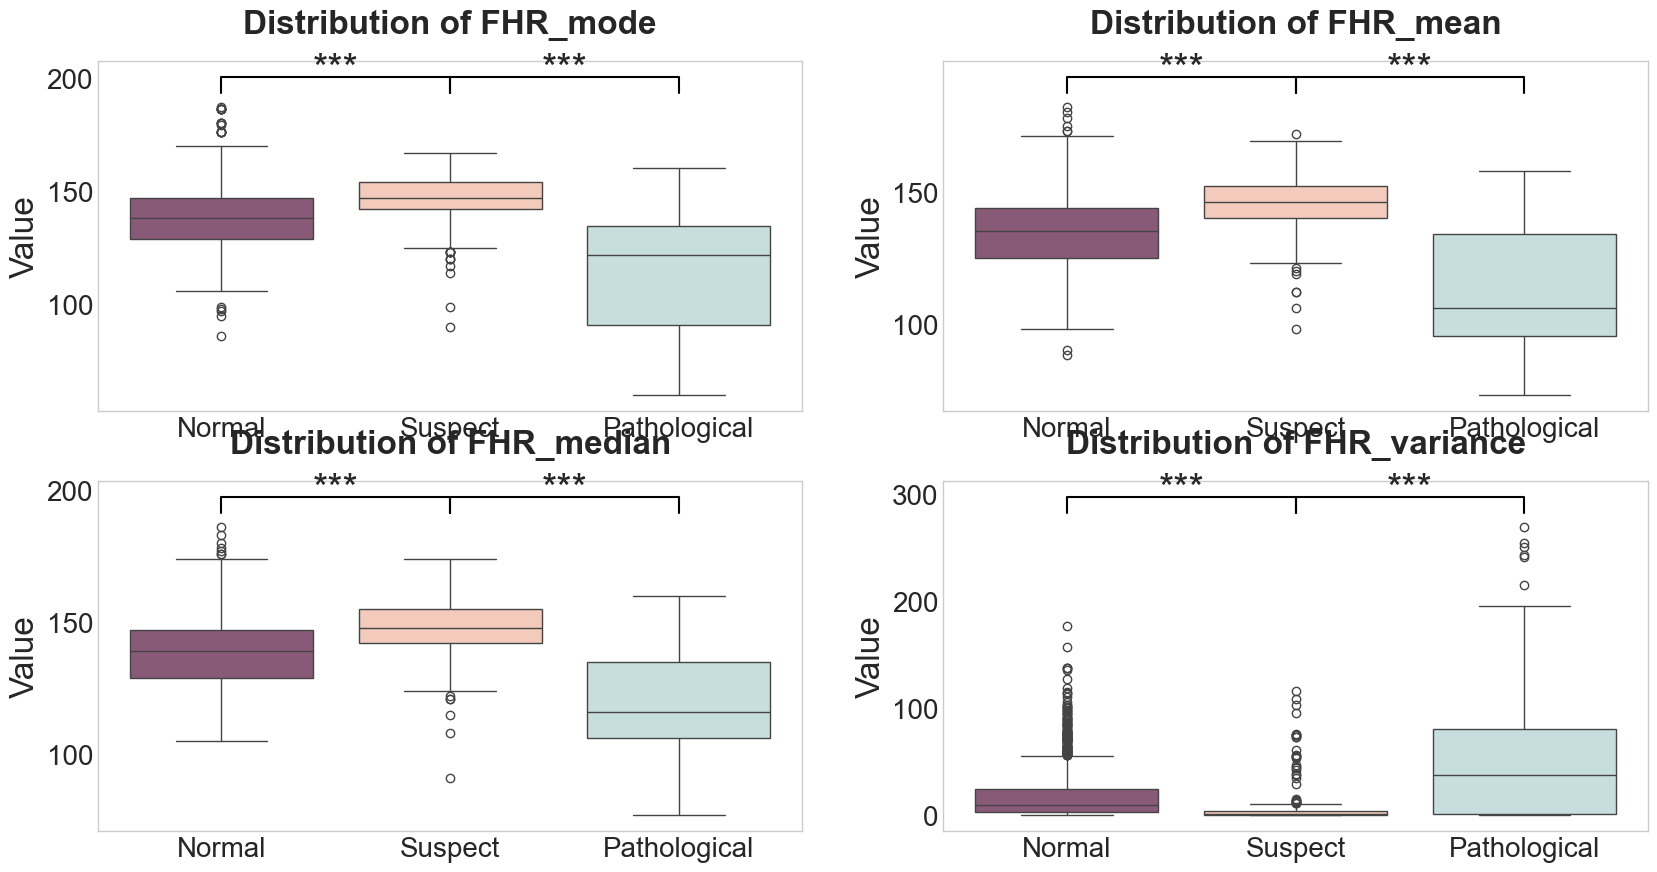

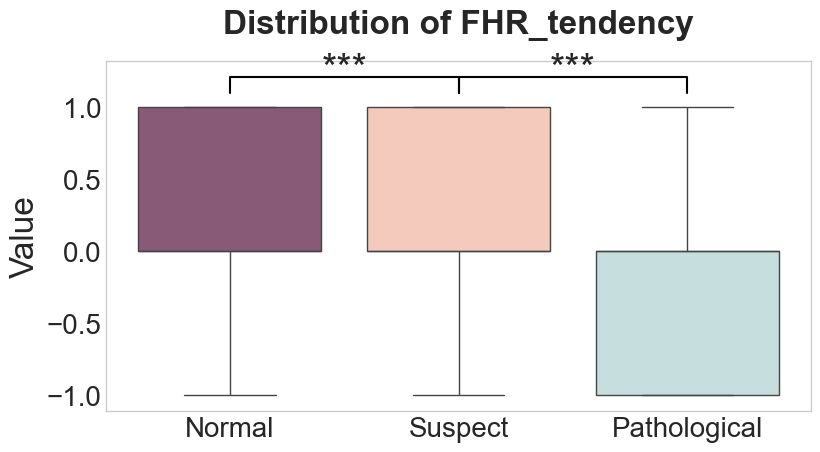

In [48]:
#ADD the significance bars

# Suppress warnings
warnings.filterwarnings('ignore')

# Example ANOVA results (replace this with your actual results)
anova_results = {
    'prolongued_decelerations': 1.284117e-180,
    'abnormal_short_term_variability': 5.762476e-128,
    'percentage_of_time_with_abnormal_long_term_variability': 3.337805e-127,
    'FHR_mean': 5.688802e-115,
    'FHR_mode': 2.464580e-107,
    'FHR_median': 4.653327e-98,
    'accelerations': 2.698959e-78,
    'FHR_variance': 5.329884e-62,
    'baseline_value_FHR(BPM)': 5.488269e-57,
    'mean_abnormal_short_term_variability': 2.524827e-49,
    'uterine_contractions': 1.082209e-39,
    'FHR_min': 8.070895e-37,
    'mean_abnormal_long_term_variability': 6.340803e-30,
    'light_decelerations': 7.777535e-29,
    'FHR_width': 1.095206e-23,
    'FHR_tendency': 8.371473e-20,
    'severe_decelerations': 6.496865e-13,
    'FHR_n_of_peaks': 8.613910e-06,
    'fetal_movement': 8.839302e-06,
    'FHR_max': 8.043248e-02,
    'FHR_n_of_zeros': 1.185117e-01
}

# Significance thresholds
def get_significance_symbol(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return ''

# Add significance bar function
def add_significance_bar(ax, category_pairs, p_value, y_offset_factor=0.05):
    significance = get_significance_symbol(p_value)
    if significance:
        # Get the y-axis limits to determine where to place the bar
        ymin, ymax = ax.get_ylim()
        y_offset = (ymax - ymin) * y_offset_factor

        # Draw the line and text above the max y-value
        for (x1, x2) in category_pairs:
            ax.plot([x1, x1, x2, x2], [ymax, ymax + y_offset, ymax + y_offset, ymax], lw=1.5, color='black')
            ax.text((x1 + x2) * .5, ymax + y_offset * 0.8, significance, ha='center', fontsize=28)  # Adjusting y position

# Convert 'fetal_health' to a categorical type with the specified order
df['fetal_health'] = pd.Categorical(df['fetal_health'], 
                                     categories=["Normal", "Suspect", "Pathological"], 
                                     ordered=True)

# Drop the target variable from the features
X = df.drop('fetal_health', axis=1)

# Custom palette for fetal_health categories
custom_palette = {'Normal': '#91517b', 'Suspect': '#fdc5b1', 'Pathological': '#c3e2e2'}

# Number of rows and columns for splitting the plots
rows_per_image = 2  # Two rows
total_columns = 2    # Two columns

# Loop through chunks of columns and save the figures
for i in range(0, len(X.columns), rows_per_image * total_columns):
    # Create the figure
    plt.figure(figsize=(20, rows_per_image * 5))
    
    num_row = 1
    for j, col in enumerate(X.columns[i:i + rows_per_image * total_columns], start=1):
        plt.rcParams['font.size'] = 24
        ax = plt.subplot(rows_per_image, total_columns, num_row)
        
        # Set title with larger font size and bold
        plt.title(f"Distribution of {col}", fontsize=24, fontweight='bold', pad=20)  # Increase padding
        
        # Plot boxplot with the specified hue order and custom palette
        sns.boxplot(y=df[col], x=df['fetal_health'], palette=custom_palette, ax=ax)
        
        # Remove x-axis title
        plt.xlabel("", fontsize=24)
        plt.ylabel('Value', fontsize=24)
        
        # Set larger font size for ticks
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        
        # Get the p-value from ANOVA results for the current feature
        p_value = anova_results.get(col, np.nan)
        
        # Add significance bar if p-value is significant
        if not np.isnan(p_value):
            add_significance_bar(ax, [(0, 1), (1, 2)], p_value)
        
        # Remove grid
        ax.grid(False)
        
        num_row += 1
        
    
    # Save each chunk of plots as a separate image
   # plt.tight_layout()
   # plt.savefig(f'fetal_health_plots_part_{i // (rows_per_image * total_columns) + 1}.png', dpi=300)
    
plt.show()

In [440]:
# remake target col numerical to show correlations
import warnings
warnings.filterwarnings('ignore')

df['fetal_health'].replace({'Normal':1,'Suspect':2 ,'Pathological':3},inplace=True)
print(df['fetal_health'].value_counts())
print(df['fetal_health'].dtype)

fetal_health
1    1646
2     292
3     175
Name: count, dtype: int64
int64


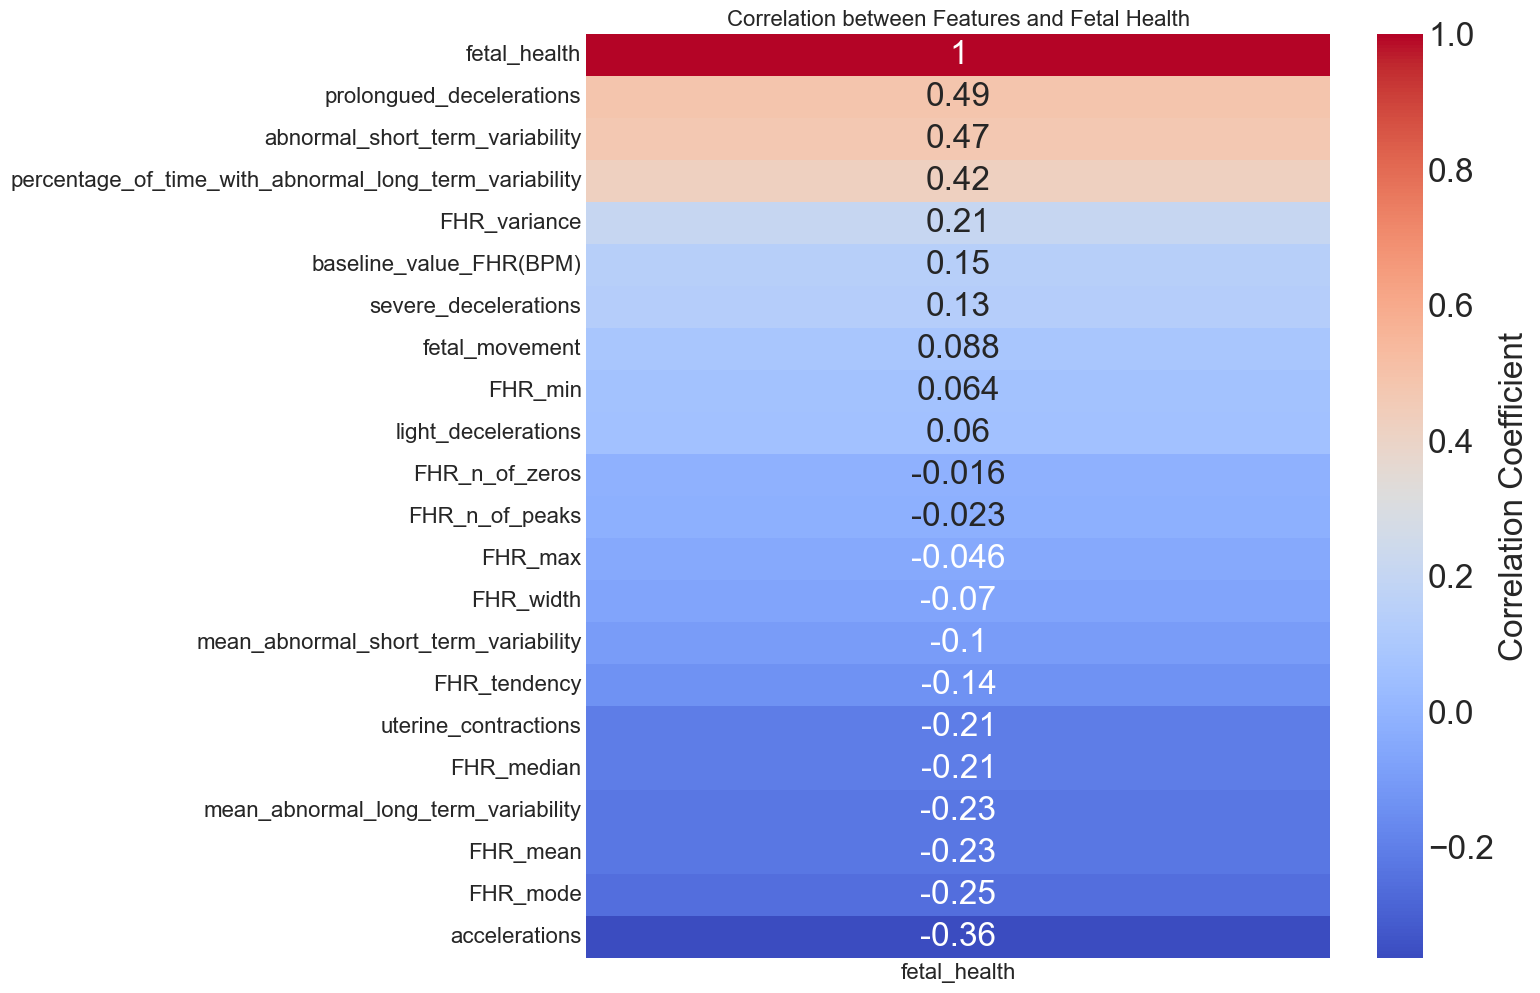

,Feature,Correlation Coefficient,P-Value,Significant
0,baseline_value_FHR(BPM),0.146077,1.509211e-11,True
1,accelerations,-0.363947,3.492576e-67,True
2,fetal_movement,0.088057,5.051779e-05,True
3,uterine_contractions,-0.205117,1.657498e-21,True
4,light_decelerations,0.059651,6.091624e-03,True
5,severe_decelerations,0.132408,9.976669e-10,True
6,prolongued_decelerations,0.486752,3.981549e-126,True
7,abnormal_short_term_variability,0.469671,2.116980e-116,True
8,mean_abnormal_short_term_variability,-0.101089,3.224368e-06,True
9,percentage_of_time_with_abnormal_long_term_var...,0.421634,7.696043e-92,True


In [51]:
#check if correlation is significant 

# Calculate the correlation matrix
corr_matrix = df.corr()

# Extract the correlation values with respect to 'fetal_health'
fetal_health_corr = corr_matrix[['fetal_health']].sort_values(by='fetal_health', ascending=False)

# Initialize lists to store results
results = []

# Loop through each feature to calculate correlation with 'fetal_health'
for feature in df.columns:
    if feature != 'fetal_health':
        # Calculate the Pearson correlation coefficient and p-value
        corr_coeff, p_value = stats.pearsonr(df[feature], df['fetal_health'])
        results.append((feature, corr_coeff, p_value))

# Create a DataFrame to summarize the results
results_df = pd.DataFrame(results, columns=['Feature', 'Correlation Coefficient', 'P-Value'])

# Adjusting the significance level
alpha = 0.05
results_df['Significant'] = results_df['P-Value'] < alpha

# Adjust the figure size to ensure all labels are visible
plt.figure(figsize=(12, 12))  # Increase the height to accommodate all features

# Plot heatmap with all labels and rotation
sns.heatmap(fetal_health_corr, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0, fontsize=16)
plt.xticks(fontsize=16)

# Set the title
plt.title('Correlation between Features and Fetal Health', fontsize=16)
plt.show()

# Save the correlation matrix to a CSV
#fetal_health_corr.to_csv('correlation_matrix_target.csv')

# Save the results DataFrame to a CSV file
#results_df.to_csv('fetal_health_correlation_significance_results.csv', index=False)

# Display the results DataFrame
display(results_df)


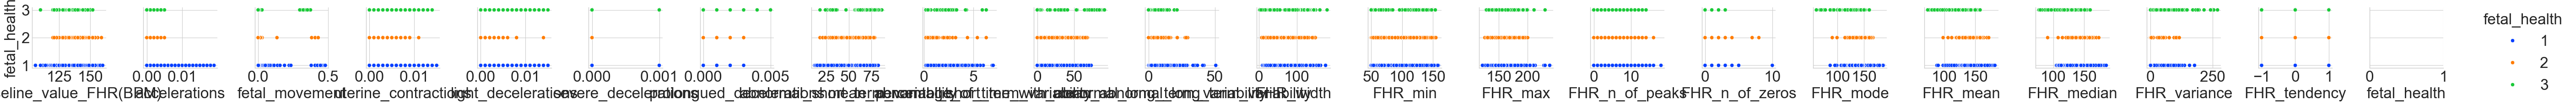

In [52]:
# checking to see the relationships b/w the target & features
sns.pairplot(df, y_vars=['fetal_health'], x_vars=df.columns[:], kind='scatter', hue='fetal_health',  palette='bright')

plt.show()

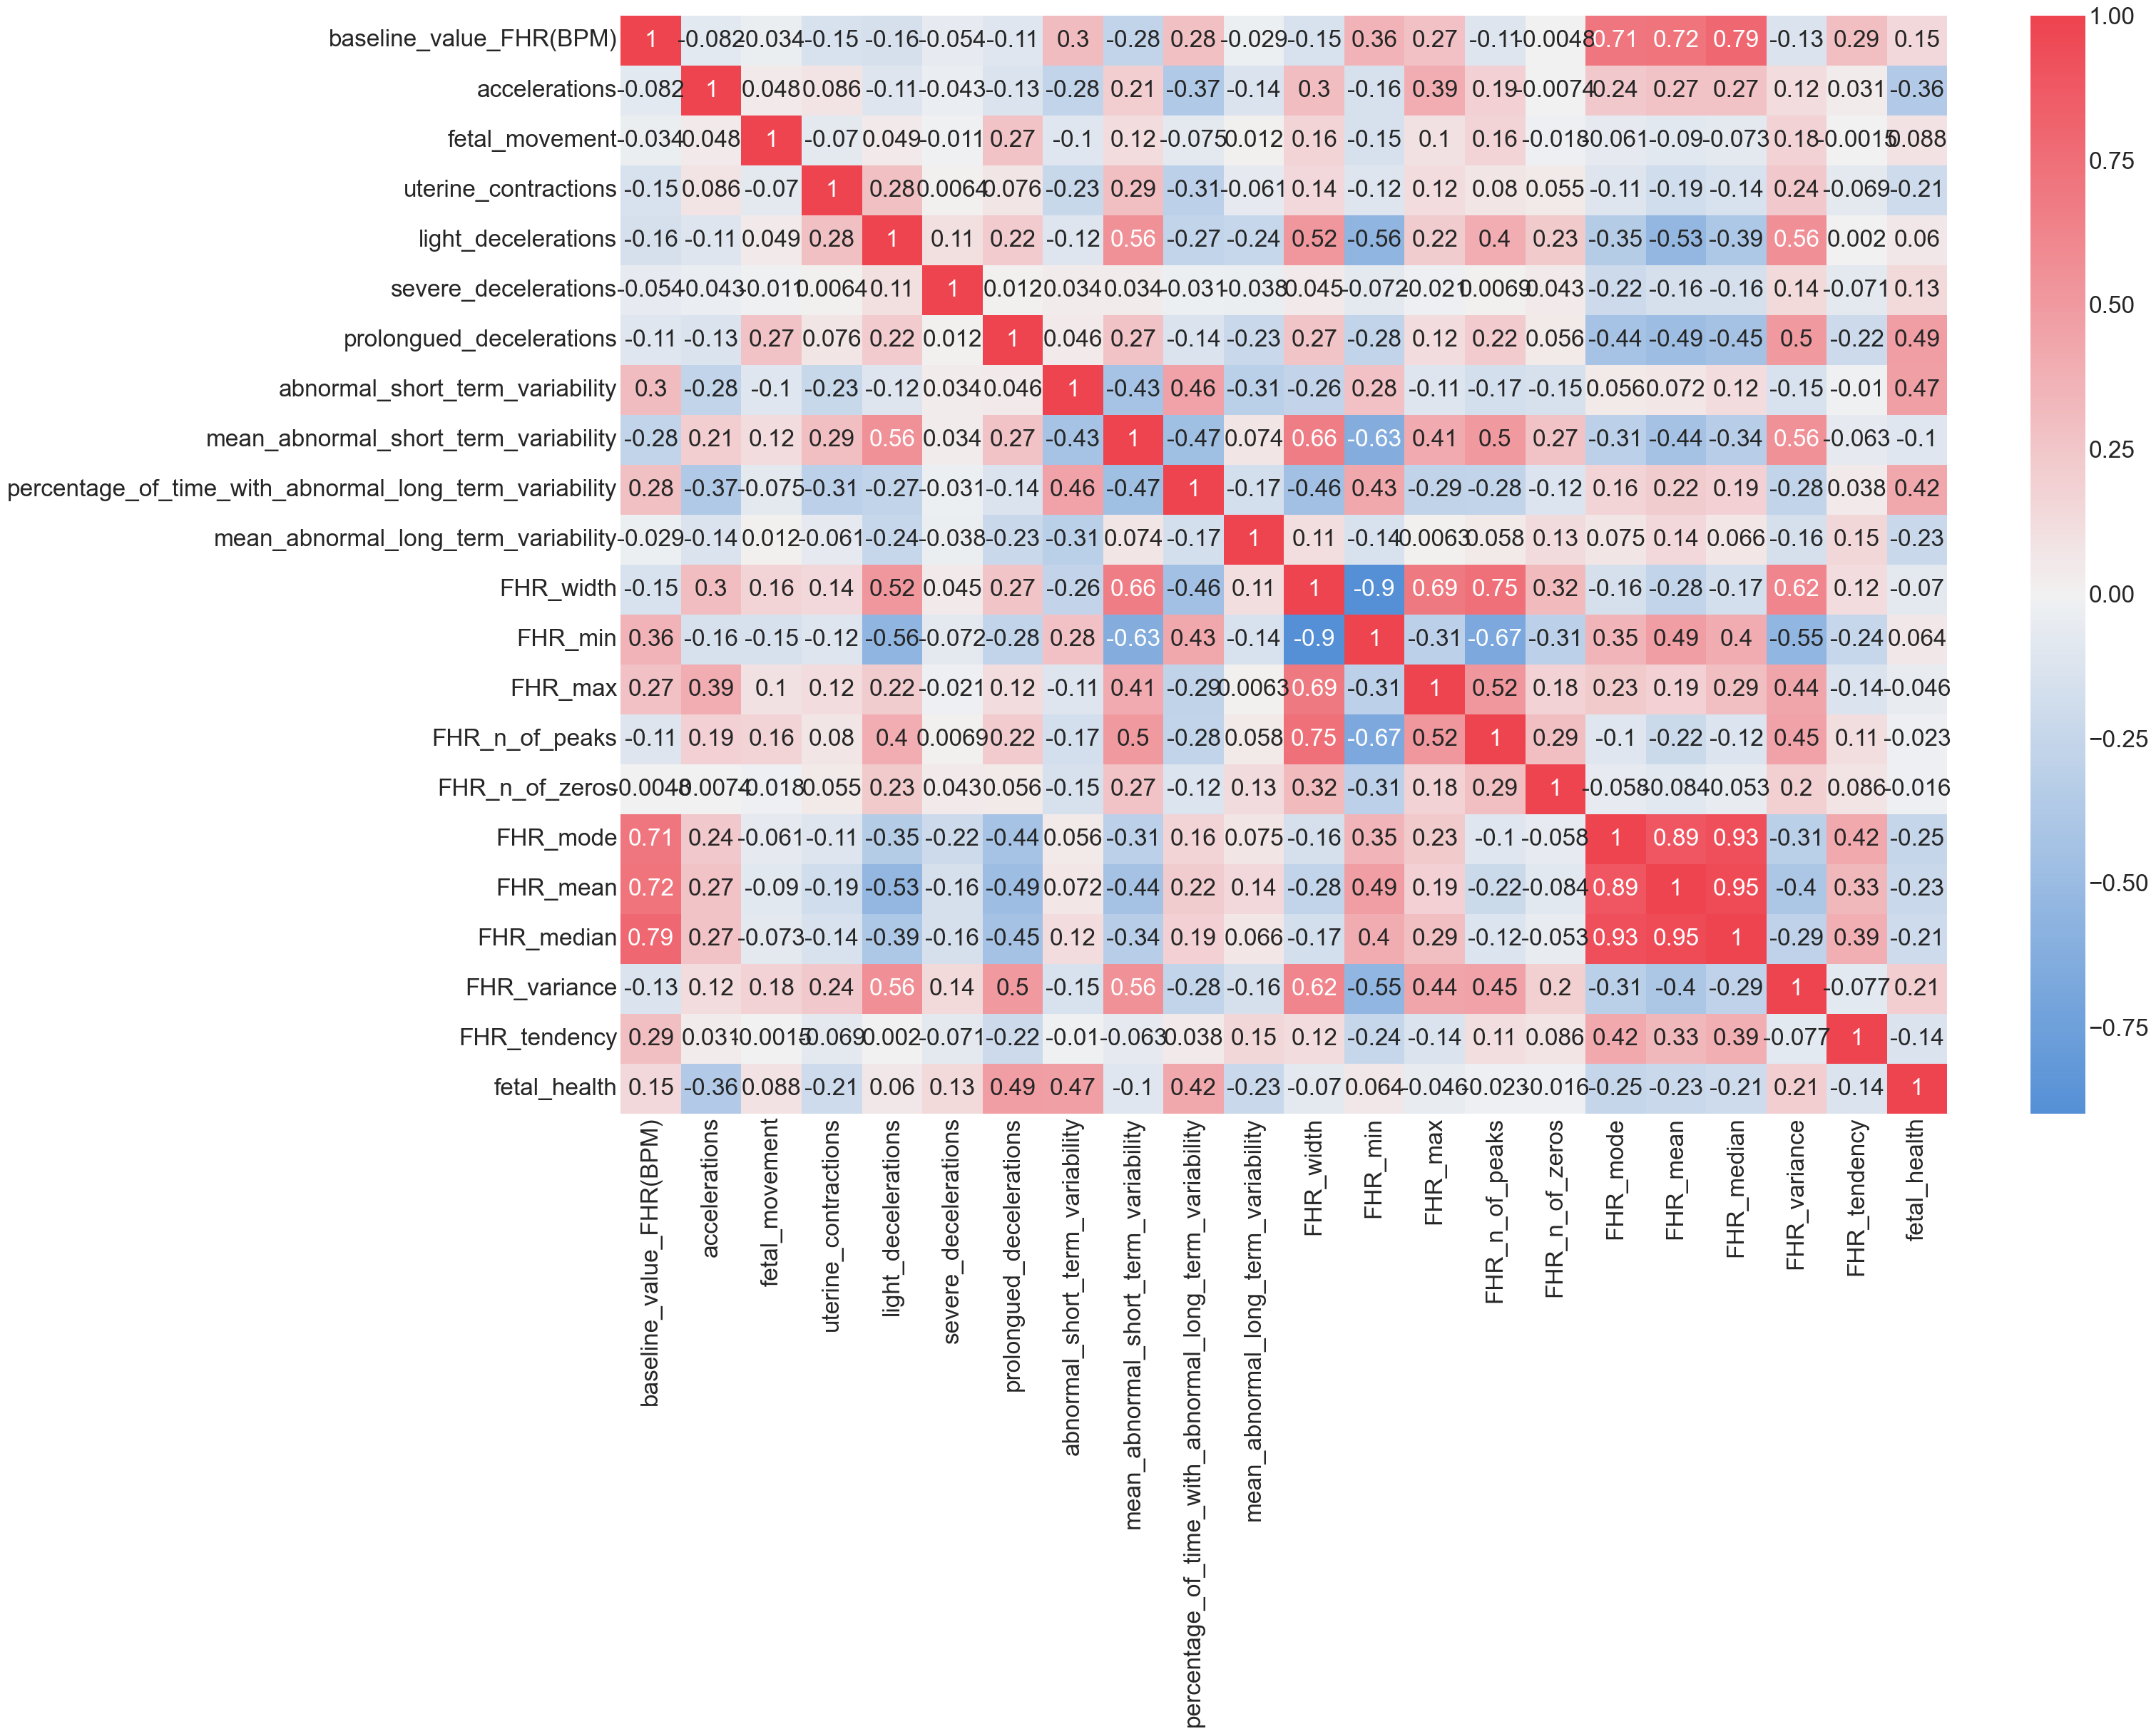

,Variable 1,Variable 2,Correlation Coefficient,P-Value,Significant
0,baseline_value_FHR(BPM),accelerations,-0.081885,1.644673e-04,True
1,baseline_value_FHR(BPM),fetal_movement,-0.033949,1.187406e-01,False
2,baseline_value_FHR(BPM),uterine_contractions,-0.149587,4.813451e-12,True
3,baseline_value_FHR(BPM),light_decelerations,-0.159836,1.463152e-13,True
4,baseline_value_FHR(BPM),severe_decelerations,-0.053706,1.354657e-02,True
...,...,...,...,...,...
457,fetal_health,FHR_mode,-0.253612,2.279971e-32,True
458,fetal_health,FHR_mean,-0.230243,8.043251e-27,True
459,fetal_health,FHR_median,-0.208334,3.766261e-22,True
460,fetal_health,FHR_variance,0.208171,4.062816e-22,True


In [460]:
#check if correlation is significant 

# Calculate the correlation matrix
sample = df.corr()

# Initialize lists to store results
results = []

# Loop through each pair of columns in the DataFrame
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            # Calculate the Pearson correlation coefficient and p-value
            corr_coeff, p_value = stats.pearsonr(df[col1], df[col2])
            results.append((col1, col2, corr_coeff, p_value))

# Create a DataFrame to summarize the results
results_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Correlation Coefficient', 'P-Value'])

# Adjusting the significance level
alpha = 0.05
results_df['Significant'] = results_df['P-Value'] < alpha

# Display the correlation matrix heatmap
plt.figure(figsize=(30, 20))
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(sample, annot=True, cmap=cmap, center=0)

#plt.savefig('correlation_matrix_red.png', format='png', dpi=300)  # Adjust dpi for quality
plt.show()

# Display the results DataFrame
display(results_df)

# Save the results DataFrame to a CSV file
#results_df.to_csv('correlation_significance_results.csv', index=False)


In [54]:
df_copy=df.copy()
correlation_matrix = df_copy.corr()
high_correlation_mask = np.abs(correlation_matrix) >= 0.75

highly_correlated_features = []
for feature in high_correlation_mask.columns:
    correlated_features = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_features:
        if feature != correlated_feature and correlated_feature not in highly_correlated_features:
           highly_correlated_features.append((feature, correlated_feature))

for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2} are highly correlated")

baseline_value_FHR(BPM) and FHR_median are highly correlated
FHR_width and FHR_min are highly correlated
FHR_min and FHR_width are highly correlated
FHR_mode and FHR_mean are highly correlated
FHR_mode and FHR_median are highly correlated
FHR_mean and FHR_mode are highly correlated
FHR_mean and FHR_median are highly correlated
FHR_median and baseline_value_FHR(BPM) are highly correlated
FHR_median and FHR_mode are highly correlated
FHR_median and FHR_mean are highly correlated


***SOLVING THE IMBALANCE ISSUE BY RESAMPLING***

In [29]:
#solve imbalance problem using smote
# reconvert into objects
df['fetal_health'] = df['fetal_health'].replace({1:'Normal',2:'Suspect' ,3:'Pathological'})
#df['fetal_health'] = df['fetal_health'].astype(object)
X = df.drop('fetal_health', axis=1) 
y = df['fetal_health']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_test= pd.DataFrame(X_test, columns=X.columns)
df['fetal_health'].value_counts()

fetal_health
Normal          1646
Suspect          292
Pathological     175
Name: count, dtype: int64

In [31]:
smote = SMOTE(random_state=42)
print("Before SMOTE:", Counter(y_train))
X_train, y_train = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train))

resampled_df = pd.DataFrame(X_train, columns=X.columns)
resampled_df['fetal_health'] = y_train

Before SMOTE: Counter({'Normal': 1316, 'Suspect': 234, 'Pathological': 140})
After SMOTE: Counter({'Normal': 1316, 'Suspect': 1316, 'Pathological': 1316})


In [328]:
resampled_df['fetal_health'].value_counts()

fetal_health
Normal          1316
Suspect         1316
Pathological    1316
Name: count, dtype: int64

***TRAIN DIFFERENT ML MODELS***

In [33]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
palette = sns.color_palette('mako')
template = 'plotly_dark'

In [35]:
from sklearn.preprocessing import RobustScaler, StandardScaler,MinMaxScaler ,LabelEncoder

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [332]:
resampled_df['fetal_health'].value_counts()

fetal_health
Normal          1316
Suspect         1316
Pathological    1316
Name: count, dtype: int64

In [419]:
# Initialize the results dictionary
results = {
    'Model': [],
    'Accuracy': [],
    'Precision':[],
    'Recall':[],
    'F1 Score (Weighted)': [],
    "Cohen's Kappa": []
}


In [344]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
print("Running GridSearchCV for K-Nearest Neighbors...")
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1_weighted')
knn_grid.fit(X_train_scaled, y_train)
knn_best = knn_grid.best_estimator_
print(f"Best k-NN Params: {knn_grid.best_params_}")

Running GridSearchCV for K-Nearest Neighbors...
Best k-NN Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Cohen Kappa:  0.78
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.93      0.95       330
Pathological       0.82      0.89      0.85        35
     Suspect       0.66      0.84      0.74        58

    accuracy                           0.91       423
   macro avg       0.82      0.89      0.85       423
weighted avg       0.93      0.91      0.92       423



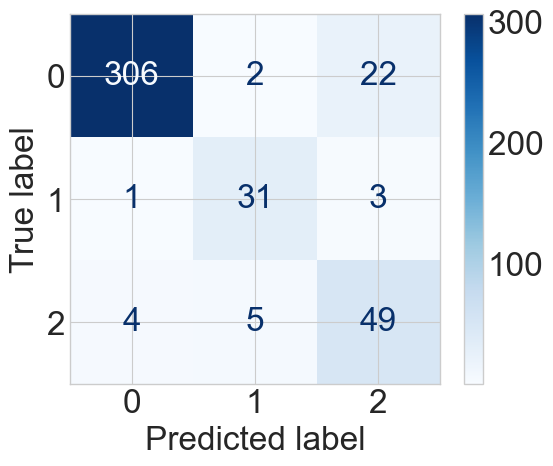


Comparison of Model Performance:
                 Model  Accuracy  Precision   Recall  F1 Score (Weighted)  \
0  K-Nearest Neighbors   0.91253   0.925893  0.91253             0.916919   

   Cohen's Kappa  
0       0.778556  


In [421]:
# Initialize KNN model with the best parameters found earlier
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
knn_best.fit(X_train_scaled, y_train)

# Predict using the test data
knn_pred = knn_best.predict(X_test_scaled)

# Calculate metrics
knn_kappa = cohen_kappa_score(y_test, knn_pred)
print(f"Cohen Kappa: {knn_kappa: .2f}")

knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')
knn_acc = accuracy_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)

# Display classification report and confusion matrix
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_pred))
ConfusionMatrixDisplay(confusion_matrix=knn_cm).plot(cmap='Blues')
plt.show()

# Add results to the comparison table
results['Model'].append('K-Nearest Neighbors')
results['Accuracy'].append(knn_acc)
results['Precision'].append(knn_precision)
results['Recall'].append(knn_recall)
results['F1 Score (Weighted)'].append(knn_f1)
results["Cohen's Kappa"].append(knn_kappa)

# Display the results in a table format

results_df = pd.DataFrame(results)
print("\nComparison of Model Performance:")
print(results_df)


In [43]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score

In [350]:
# Random Forest
print("Running GridSearchCV for Random Forest...")
rf_params = {
    'n_estimators': [10, 15, 20, 30, 50],
    'max_depth': [3, 5, 10, 15, 20]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=0), rf_params, cv=5, scoring='f1_weighted')
rf_grid.fit(X_train_scaled, y_train)
rf_best = rf_grid.best_estimator_
print(f"Best Random Forest Params: {rf_grid.best_params_}")
rf_pred = rf_best.predict(X_test_scaled)

Running GridSearchCV for Random Forest...
Best Random Forest Params: {'max_depth': 20, 'n_estimators': 50}


Cohen kappa:  0.88
Random Forest Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.98      0.98       330
Pathological       0.92      0.94      0.93        35
     Suspect       0.86      0.84      0.85        58

    accuracy                           0.96       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.96      0.96      0.96       423



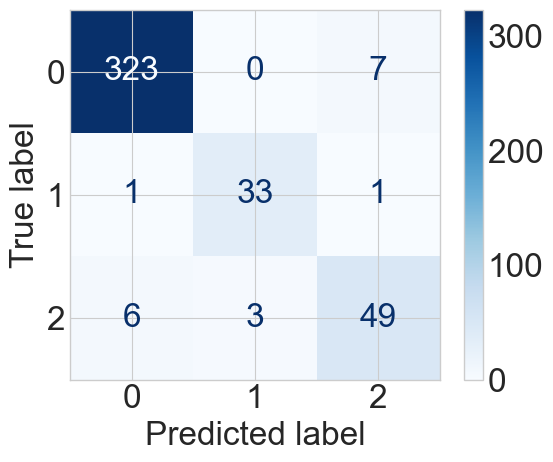

In [423]:
rf_best = RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)
rf_best.fit(X_train_scaled, y_train)

# Calculate metrics
rf_kappa = cohen_kappa_score(y_test, rf_pred)
print(f"Cohen kappa: {rf_kappa: .2f}")

rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_acc = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

# Display classification report and confusion matrix
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
ConfusionMatrixDisplay(confusion_matrix=rf_cm).plot(cmap='Blues')
plt.show()

# Add results to the comparison table
results['Model'].append('Random Forest')
results['Accuracy'].append(rf_acc)
results['Precision'].append(rf_precision)
results['Recall'].append(rf_recall)
results['F1 Score (Weighted)'].append(rf_f1)
results["Cohen's Kappa"].append(rf_kappa)

In [362]:
# AdaBoost
print("Running GridSearchCV for AdaBoost...")
ada_params = {
    'n_estimators': [100, 200, 250, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}
ada_grid = GridSearchCV(AdaBoostClassifier(random_state=0), ada_params, cv=5, scoring='f1_weighted')
ada_grid.fit(X_train_scaled, y_train)
ada_best = ada_grid.best_estimator_
print(f"Best AdaBoost Params: {ada_grid.best_params_}")

Running GridSearchCV for AdaBoost...
Best AdaBoost Params: {'learning_rate': 0.1, 'n_estimators': 250}


Cohen kappa:  0.75
AdaBoost Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.89      0.94       330
Pathological       0.92      0.94      0.93        35
     Suspect       0.60      0.91      0.72        58

    accuracy                           0.90       423
   macro avg       0.83      0.92      0.86       423
weighted avg       0.93      0.90      0.91       423



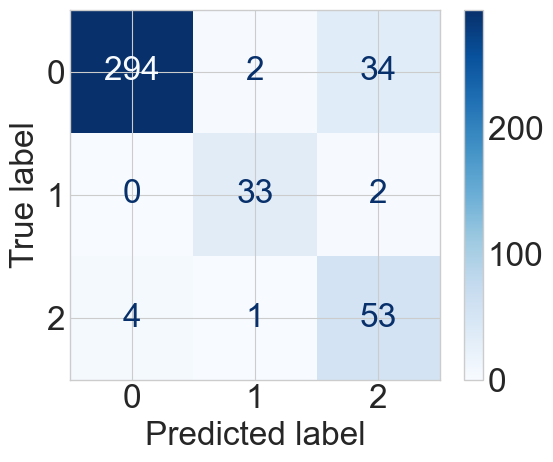

In [425]:
ada_best = AdaBoostClassifier(learning_rate=0.1, n_estimators=250, random_state=42)
ada_best.fit(X_train_scaled, y_train)

ada_pred = ada_best.predict(X_test_scaled)

# Calculate metrics
ada_kappa = cohen_kappa_score(y_test, ada_pred)
print(f"Cohen kappa: {ada_kappa: .2f}")

ada_precision = precision_score(y_test, ada_pred, average='weighted')
ada_recall = recall_score(y_test, ada_pred, average='weighted')
ada_f1 = f1_score(y_test, ada_pred, average='weighted')
ada_acc = accuracy_score(y_test, ada_pred)
ada_cm = confusion_matrix(y_test, ada_pred)

# Display classification report and confusion matrix
print("AdaBoost Classification Report:")
print(classification_report(y_test, ada_pred))
ConfusionMatrixDisplay(confusion_matrix=ada_cm).plot(cmap='Blues')
plt.show()

# Add results to the comparison table
results['Model'].append('AdaBoost')
results['Accuracy'].append(ada_acc)
results['Precision'].append(ada_precision)
results['Recall'].append(ada_recall)
results['F1 Score (Weighted)'].append(ada_f1)
results["Cohen's Kappa"].append(ada_kappa)


In [368]:
# Gradient Boosting
print("Running GridSearchCV for Gradient Boosting...")
gb_params = {
    'n_estimators': [200, 250, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7]
}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=0), gb_params, cv=5, scoring='f1_weighted')
gb_grid.fit(X_train_scaled, y_train)
gb_best = gb_grid.best_estimator_
print(f"Best Gradient Boosting Params: {gb_grid.best_params_}")

Running GridSearchCV for Gradient Boosting...
Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


Cohen kappa:  0.88
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.98      0.98       330
Pathological       0.94      0.94      0.94        35
     Suspect       0.89      0.81      0.85        58

    accuracy                           0.96       423
   macro avg       0.93      0.91      0.92       423
weighted avg       0.96      0.96      0.96       423



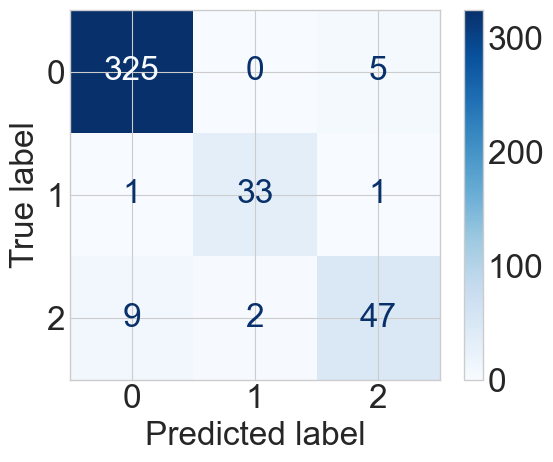

In [427]:
gb_best = GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=300)
gb_best.fit(X_train_scaled, y_train)

gb_pred = gb_best.predict(X_test_scaled)

# Calculate metrics
gb_kappa = cohen_kappa_score(y_test, gb_pred)
print(f"Cohen kappa: {gb_kappa: .2f}")

gb_precision = precision_score(y_test, gb_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
gb_acc = accuracy_score(y_test, gb_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

# Display classification report and confusion matrix
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))
ConfusionMatrixDisplay(confusion_matrix=gb_cm).plot(cmap='Blues')
plt.show()

# Add results to the comparison table
results['Model'].append('Gradient Boosting')
results['Accuracy'].append(gb_acc)
results['Precision'].append(gb_precision)
results['Recall'].append(gb_recall)
results['F1 Score (Weighted)'].append(gb_f1)
results["Cohen's Kappa"].append(gb_kappa)

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target labels (y_train and y_test)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [376]:
# XGBoost 
print("Running GridSearchCV for XGBoost...")
xgb_params = {
    'n_estimators': [30, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 6, 8],
    'gamma': [0, 0.5, 1]
}

xgb_grid = GridSearchCV(XGBClassifier(random_state=0), xgb_params, cv=5, scoring='f1_weighted')
xgb_grid.fit(X_train_scaled, y_train_encoded)
xgb_best = xgb_grid.best_estimator_
print(f"Best XGBoost Params: {xgb_grid.best_params_}")
xgb_pred = xgb_best.predict(X_test_scaled)

# Decode the predictions back to the original class labels
#xgb_pred_decoded = label_encoder.inverse_transform(xgb_pred)

Running GridSearchCV for XGBoost...
Best XGBoost Params: {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 200}


Cohen Kappa:  0.91
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       330
           1       0.94      0.94      0.94        35
           2       0.93      0.86      0.89        58

    accuracy                           0.97       423
   macro avg       0.95      0.93      0.94       423
weighted avg       0.97      0.97      0.97       423



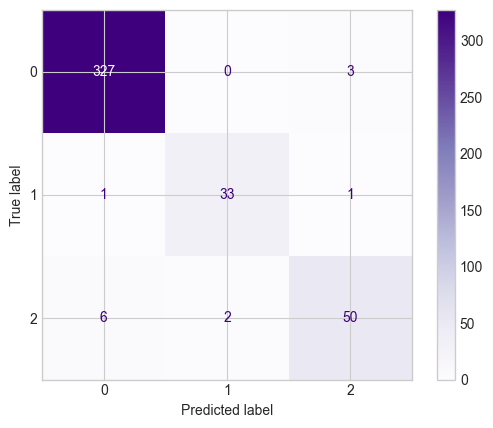

NameError: name 'results' is not defined

In [45]:
xgb_best = XGBClassifier(gamma = 0, learning_rate = 0.5, max_depth = 6, n_estimators = 200)

xgb_best.fit(X_train_scaled, y_train_encoded)

xgb_pred = xgb_best.predict(X_test_scaled)

xgb_pred_decoded = label_encoder.inverse_transform(xgb_pred)

# Evaluate the model
xgb_kappa = cohen_kappa_score(y_test_encoded, xgb_pred)
print(f"Cohen Kappa: {xgb_kappa: .2f}")
xgb_f1 = f1_score(y_test_encoded, xgb_pred, average='weighted')
xgb_acc = accuracy_score(y_test_encoded, xgb_pred)
xgb_cm = confusion_matrix(y_test_encoded, xgb_pred)
xgb_precision = precision_score(y_test_encoded, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test_encoded, xgb_pred, average='weighted')

# Display results
print("XGBoost Classification Report:")
print(classification_report(y_test_encoded, xgb_pred))
ConfusionMatrixDisplay(confusion_matrix=xgb_cm).plot(cmap='Purples')
plt.show()

# Add results to the comparison table
results['Model'].append('XGBoost')
results['Accuracy'].append(xgb_acc)
results['Precision'].append(xgb_precision)
results['Recall'].append(xgb_recall)
results['F1 Score (Weighted)'].append(xgb_f1)
results["Cohen's Kappa"].append(xgb_kappa)


In [429]:
# Create the DataFrame for displaying the results
results_df = pd.DataFrame(results)

# Save to CSV
results_df.to_csv("ML_models_comparison.csv")

# Display the results in a table format
print("\nComparison of Model Performance:")
display(results_df)


Comparison of Model Performance:


,Model,Accuracy,Precision,Recall,F1 Score (Weighted),Cohen's Kappa
0,K-Nearest Neighbors,0.912530,0.925893,0.912530,0.916919,0.778556
1,Random Forest,0.957447,0.957312,0.957447,0.957355,0.883690
2,AdaBoost,0.898345,0.927171,0.898345,0.906239,0.754756
3,Gradient Boosting,0.957447,0.956462,0.957447,0.956675,0.881180
4,XGBoost,0.969267,0.968765,0.969267,0.968832,0.914548


In [408]:
# Predictions for the training set
xgb_train_pred = xgb_best.predict(X_train_scaled)

# Calculate metrics for the training set
xgb_train_acc = accuracy_score(y_train_encoded, xgb_train_pred)
xgb_train_precision = precision_score(y_train_encoded, xgb_train_pred, average='weighted')
xgb_train_recall = recall_score(y_train_encoded, xgb_train_pred, average='weighted')
xgb_train_f1 = f1_score(y_train_encoded, xgb_train_pred, average='weighted')
xgb_train_kappa = cohen_kappa_score(y_train_encoded, xgb_train_pred)

# Create a comparison DataFrame
metrics_comparison = {
    'Metric': ['Accuracy', 'Precision (avg)', 'Recall (avg)', 'F1 Score (avg)', "Cohen's Kappa"],
    'Training Set': [xgb_train_acc, xgb_train_precision, xgb_train_recall, xgb_train_f1, xgb_train_kappa],
    'Test Set': [xgb_acc, xgb_precision, xgb_recall, xgb_f1, xgb_kappa]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(metrics_comparison)

# Calculate difference between training and test accuracy
acc_diff = xgb_train_acc - xgb_acc

# Display the comparison table
print("XGBoost Model Performance Comparison:")
display(comparison_df)

# Analyze Overfitting or Underfitting
if xgb_train_acc < 0.7 and xgb_acc < 0.7:
    fit_status = "Underfitting: The model is not capturing the underlying patterns in the data."
elif acc_diff > 0.1:
    fit_status = "Overfitting: The model performs significantly better on the training set than on the test set."
elif acc_diff < -0.1:
    fit_status = "Underfitting: The model is not performing well even on the training set."
else:
    fit_status = "Good Fit: The model is generalizing well on both training and test sets."

# Print the fit status
print("\nModel Fit Status:")
print(fit_status)

XGBoost Model Performance Comparison:


,Metric,Training Set,Test Set
0,Accuracy,0.999493,0.969267
1,Precision (avg),0.999493,0.968765
2,Recall (avg),0.999493,0.969267
3,F1 Score (avg),0.999493,0.968832
4,Cohen's Kappa,0.999240,0.914548



Model Fit Status:
Good Fit: The model is generalizing well on both training and test sets.


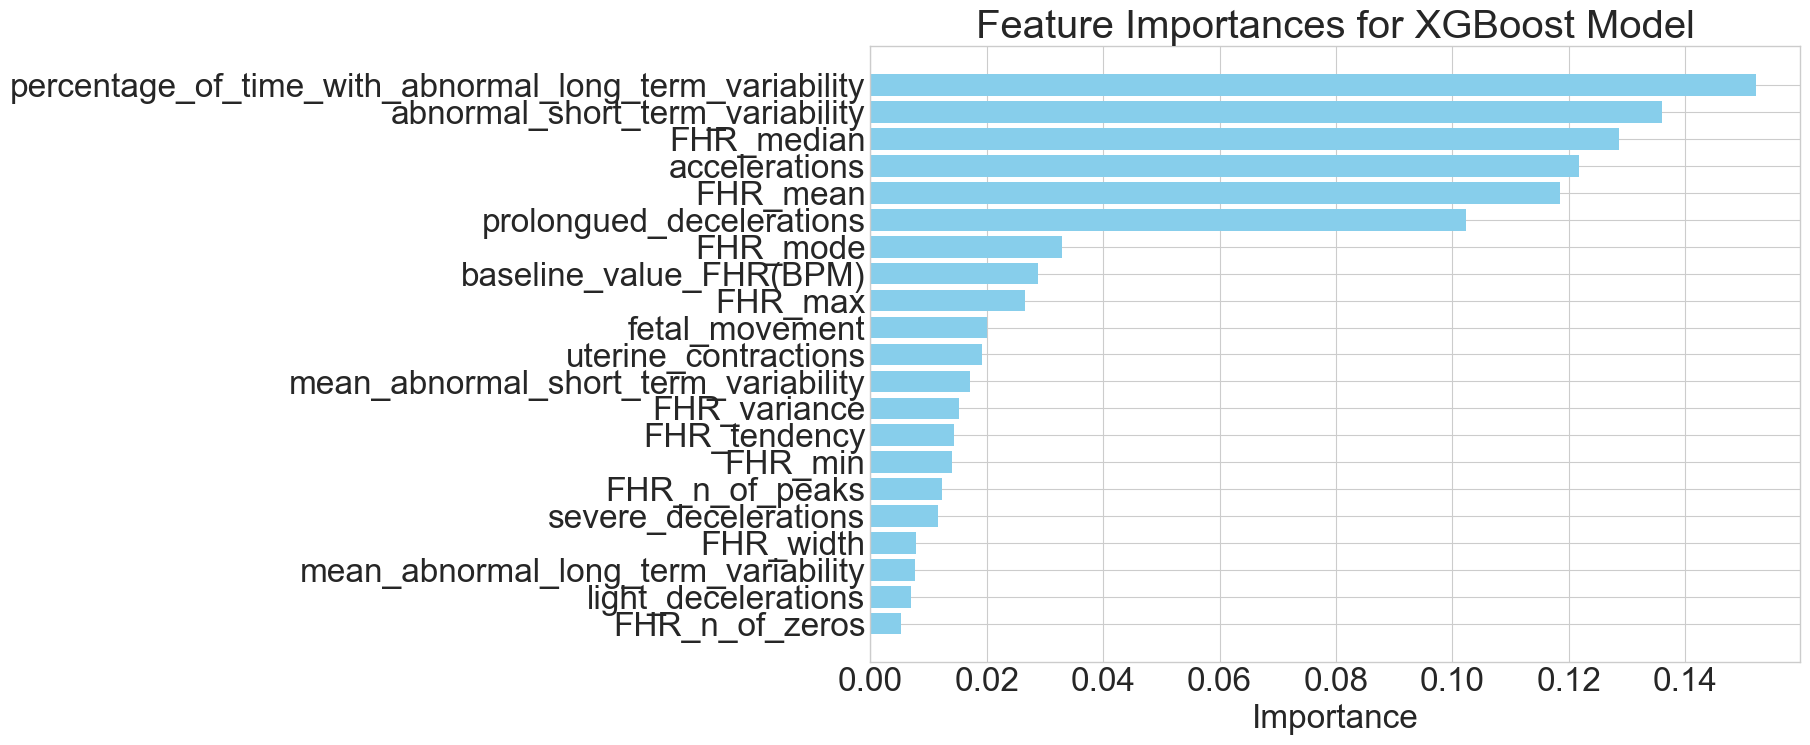


Feature Importances:
                                              Feature  Importance
9   percentage_of_time_with_abnormal_long_term_var...    0.152210
7                     abnormal_short_term_variability    0.136093
18                                         FHR_median    0.128625
1                                       accelerations    0.121840
17                                           FHR_mean    0.118450
6                            prolongued_decelerations    0.102354
16                                           FHR_mode    0.033015
0                             baseline_value_FHR(BPM)    0.028799
13                                            FHR_max    0.026629
2                                      fetal_movement    0.020099
3                                uterine_contractions    0.019159
8                mean_abnormal_short_term_variability    0.017158
19                                       FHR_variance    0.015233
20                                       FHR_tendency 

In [410]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume xgb_best is your trained XGBoost model

# Step 1: Extract feature importances
feature_importances = xgb_best.feature_importances_

# Step 2: Create a DataFrame for feature importances
features = [
    'baseline_value_FHR(BPM)', 'accelerations', 'fetal_movement',
    'uterine_contractions', 'light_decelerations', 'severe_decelerations',
    'prolongued_decelerations', 'abnormal_short_term_variability',
    'mean_abnormal_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability',
    'mean_abnormal_long_term_variability', 'FHR_width', 'FHR_min',
    'FHR_max', 'FHR_n_of_peaks', 'FHR_n_of_zeros', 'FHR_mode',
    'FHR_mean', 'FHR_median', 'FHR_variance', 'FHR_tendency'
]

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Step 3: Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plotting feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances for XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

# Optional: Display the DataFrame of feature importances
print("\nFeature Importances:")
print(importance_df)

importance_df.to_csv("Feature_importance for XGBoost Model.csv")

In [436]:
import joblib

# Save model
joblib.dump(xgb_best, 'xgb_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

# Save label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']